In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
dataDict = {
'State' : pd.Series(['FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM'],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Total Energy' : pd.Series([-223.9842666, -223.9853412, -223.9849268,-223.9855121,-223.983616,-223.9858769,-223.9811426,-223.9856887,-223.977814,-223.9809027,-223.9666981,-223.9699511,-223.9487315,-223.9504364], index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Energy Error' : pd.Series([0.000198749851,0.0002006422582,0.0002021910102,0.0001981985947,0.0002058370136,0.000197865291,0.0002035847029,0.0002077939487,0.0001998573641,0.0002029641835,0.0002013813606,0.0002082358912,0.0001978426595,0.0002056810956],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 00': pd.Series([-0.177263,-0.187528,-0.192815,-0.198587,-0.247282,-0.219076,-0.251564,-0.236547,-0.249033,-0.246752,-0.239232,-0.250832,-0.226327,-0.214689],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 00 Error': pd.Series([0.009757,0.009315,0.009836,0.009340,0.010283,0.009547,0.010229,0.009602,0.010250,0.009751,0.010265,0.009885,0.010119,0.008992],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 11':pd.Series([-0.172641,-0.164135,-0.166030,-0.156278,-0.130982,-0.154875,-0.126229,-0.155315,-0.127621,-0.157781,-0.130736,-0.163607,-0.178551,-0.066911],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 11 Error': pd.Series([0.004739,0.004850,0.004647,0.004878,0.004208,0.004960,0.004101,0.004973,0.004125,0.005050,0.004155,0.005125,0.005134,0.004493],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 01':pd.Series([0.022915,0.022554,0.024829,0.022597,0.026742,0.031251,0.026199,0.026811,0.026709,0.028992,0.026457,0.044807,0.062046,0.032632],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 01 Error': pd.Series([0.005696,0.005574,0.005618,0.005573,0.005450,0.005568,0.005382,0.005546,0.005352,0.005602,0.005256,0.005653,0.005907,0.004740],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn 01': pd.Series([-0.019318,-0.018727,-0.019952,-0.018791,-0.019855,-0.020732,-0.019403,-0.022142,-0.019528,-0.023647,-0.019288,-0.025611,-0.044366,-0.015964],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn 01 Error': pd.Series([0.011905,0.011706,0.011853,0.011732,0.012064,0.012028,0.012037,0.012138,0.012157,0.012380,0.012288,0.012638,0.013270,0.011424],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),   
'O 01': pd.Series([-0.045668,-0.047099,-0.049548,-0.048841,-0.053420,-0.055667,-0.052255,-0.063078,-0.053030,-0.069421,-0.053489,-0.077510,-0.123805,-0.049000],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'O 01 Error': pd.Series([0.005337,0.005340,0.005286,0.005333,0.005251,0.005418,0.005030,0.005371,0.004995,0.005386,0.004944,0.005348,0.005002,0.004478],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90'])
}

In [3]:
keyData = pd.DataFrame(dataDict)
keyData

,Energy Error,Mn 01,Mn 01 Error,Mn-O 00,Mn-O 00 Error,Mn-O 01,Mn-O 01 Error,Mn-O 11,Mn-O 11 Error,O 01,O 01 Error,State,Total Energy
0,0.000199,-0.019318,0.011905,-0.177263,0.009757,0.022915,0.005696,-0.172641,0.004739,-0.045668,0.005337,FM,-223.984267
0,0.000201,-0.018727,0.011706,-0.187528,0.009315,0.022554,0.005574,-0.164135,0.004850,-0.047099,0.005340,AFM,-223.985341
15,0.000202,-0.019952,0.011853,-0.192815,0.009836,0.024829,0.005618,-0.166030,0.004647,-0.049548,0.005286,FM,-223.984927
15,0.000198,-0.018791,0.011732,-0.198587,0.009340,0.022597,0.005573,-0.156278,0.004878,-0.048841,0.005333,AFM,-223.985512
30,0.000206,-0.019855,0.012064,-0.247282,0.010283,0.026742,0.005450,-0.130982,0.004208,-0.053420,0.005251,FM,-223.983616
30,0.000198,-0.020732,0.012028,-0.219076,0.009547,0.031251,0.005568,-0.154875,0.004960,-0.055667,0.005418,AFM,-223.985877
45,0.000204,-0.019403,0.012037,-0.251564,0.010229,0.026199,0.005382,-0.126229,0.004101,-0.052255,0.005030,FM,-223.981143
45,0.000208,-0.022142,0.012138,-0.236547,0.009602,0.026811,0.005546,-0.155315,0.004973,-0.063078,0.005371,AFM,-223.985689
60,0.000200,-0.019528,0.012157,-0.249033,0.010250,0.026709,0.005352,-0.127621,0.004125,-0.053030,0.004995,FM,-223.977814
60,0.000203,-0.023647,0.012380,-0.246752,0.009751,0.028992,0.005602,-0.157781,0.005050,-0.069421,0.005386,AFM,-223.980903


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


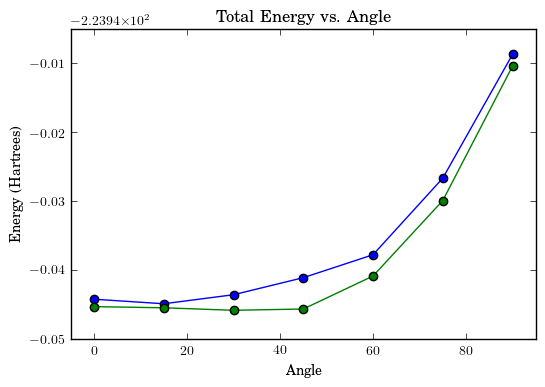

In [4]:
#energy

angle =[0,15,30,45,60,75,90]
afm = []
fm = []
errfm=[]
errafm=[]
for index, row in keyData.iterrows():
    if row[11] == 'FM':
        fm.append(row[12])
        errfm.append(row[0])
    else:
        afm.append(row[12])
        errafm.append(row[0])
plt.errorbar(angle,fm,errfm,marker='o',mew=1)
plt.errorbar(angle,afm,errafm,marker='o',mew=1)
plt.legend(loc='upper left')
plt.xlim(-5, 95)
plt.ylabel('Energy (Hartrees)')
plt.xlabel('Angle')
plt.title('Total Energy vs. Angle')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


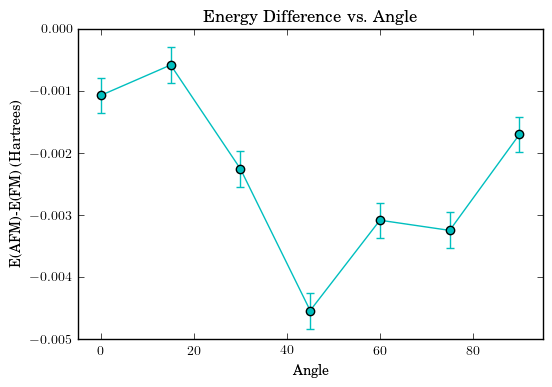

array([-0.0010746, -0.0005853, -0.0022609, -0.0045461, -0.0030887,
       -0.003253 , -0.0017049])

In [5]:
#create and plot energy diff

diff= np.array(afm)-np.array(fm)
errdiff = (np.array(errafm)**2+np.array(errfm)**2)**(1/2)
plt.errorbar(angle,diff,errdiff,marker='o',color='c',mew=1)
plt.legend(loc='upper left')
plt.xlim(-5, 95)
plt.ylabel('E(AFM)-E(FM) (Hartrees)')
plt.xlabel('Angle')
plt.title('Energy Difference vs. Angle')

plt.show()
diff

In [6]:
#Fit function
def func(x, a, b, c):
    return a*np.exp(-b*(x))+c

In [7]:
#beginning of a couple examples

MnO00afm = []
MnO00fm = []
errfm = []
errafm = []
for index, row in keyData.iterrows():
    if row[11] == 'FM':
        MnO00fm.append(row[3])
        errfm.append(row[4])
    else:
        MnO00afm.append(row[3])
        errafm.append(row[4])
MnO00afm = np.asarray(MnO00afm)
MnO00fm = np.asarray(MnO00fm)
errfm = np.asarray(errfm)
errafm = np.asarray(errafm)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


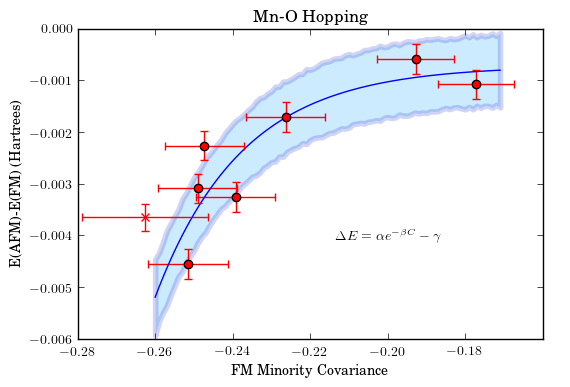

array([ -4.28728439e-08,   4.44488980e+01,  -7.16761261e-04])

In [8]:
inds = MnO00fm.argsort()
sortedErr =errfm[inds]
sortedMnO00fm = np.sort(MnO00fm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

popt, pcov = curve_fit(func, sortedMnO00fm, sortedDiff, [-.00000043,4.4,-.00071676])
x=np.arange(-0.26, -0.17, .001)
y= popt[0]*exp(-popt[1]*x)+popt[2]
error = np.random.normal(0.0007, 0.00002, size=y.shape)
#y += np.random.normal(0, 0.0001, size=y.shape)
plt.fill_between(x, y-error, y+error,    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, antialiased=True)
plt.plot(x, y)
#plt.text(-.20, -0.005,r'$y = -4.28\times 10^{-8}e^{-44x}-7.17\times 10^{-4}$', horizontalalignment='center',
#     verticalalignment='center')
plt.text(-.20, -0.004,r'$\Delta E = \alpha e^{- \beta C}-\gamma$', horizontalalignment='center',
     verticalalignment='center')
plt.errorbar(sortedMnO00fm,sortedDiff,xerr=sortedErr,yerr=sortedDiffErr,marker='o',color='r',mew=1,linestyle='None')
plt.ylabel('E(AFM)-E(FM) (Hartrees)')
plt.xlabel('FM Minority Covariance')
plt.title('Mn-O Hopping')
#Solid
#Solid MnO
#FM -- "value":[-964.3589612], "error":[0.004312391323]
#AFM -- "value":[-964.4466485], "error":[0.00437411124],
#energy per AFM bond
soldiff = [-0.0036536375]
solerr = [0.00026]
solfmcovar = [-0.262576176373]
solfmerr = [0.0162362221221873]
plt.errorbar(solfmcovar,soldiff,xerr=solfmerr,yerr=solerr,marker='x',color='r',mew=1,linestyle='None')
plt.show()
popt

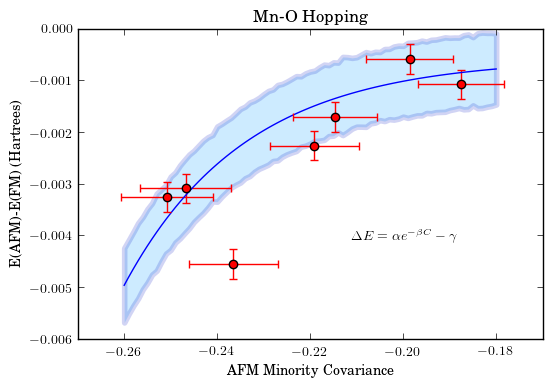

[ -2.15123211e-07   3.81713078e+01  -5.72176322e-04]


In [9]:
inds = MnO00afm.argsort()
sortedErr =errafm[inds]
sortedMnO00afm = np.sort(MnO00afm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

popt, pcov = curve_fit(func, sortedMnO00fm, sortedDiff, [-2.15001007e-07,3.81735185e+01,-5.72230001e-04])
x=np.arange(-0.26, -0.18, .001)
y= popt[0]*exp(-popt[1]*x)+popt[2]
error = np.random.normal(0.0007, 0.00002, size=y.shape)
#y += np.random.normal(0, 0.0001, size=y.shape)
plt.fill_between(x, y-error, y+error,    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, antialiased=True)
plt.plot(x, y)
#plt.text(-.20, -0.005,r'$y = -2.15\times 10^{-7}e^{-38x}-5.72\times 10^{-4}$', horizontalalignment='center',
#     verticalalignment='center')
plt.text(-.20, -0.004,r'$\Delta E = \alpha e^{- \beta C}-\gamma$', horizontalalignment='center',
     verticalalignment='center')
plt.errorbar(sortedMnO00afm,sortedDiff,xerr=sortedErr,yerr=sortedDiffErr,marker='o',color='r',mew=1,linestyle='None')
plt.ylabel('E(AFM)-E(FM) (Hartrees)')
plt.xlabel('AFM Minority Covariance')
plt.title('Mn-O Hopping')
#Solid
solafmcovar = [-0.24632477282]
solafmerr = [0.01624465174517049]
#plt.errorbar(solafmcovar,soldiff,xerr=solafmerr,yerr=solerr,marker='x',color='r',mew=1,linestyle='None')
plt.show()
print(popt)

[ -2.94056301e-04   1.15169890e+01   1.68157587e-03]


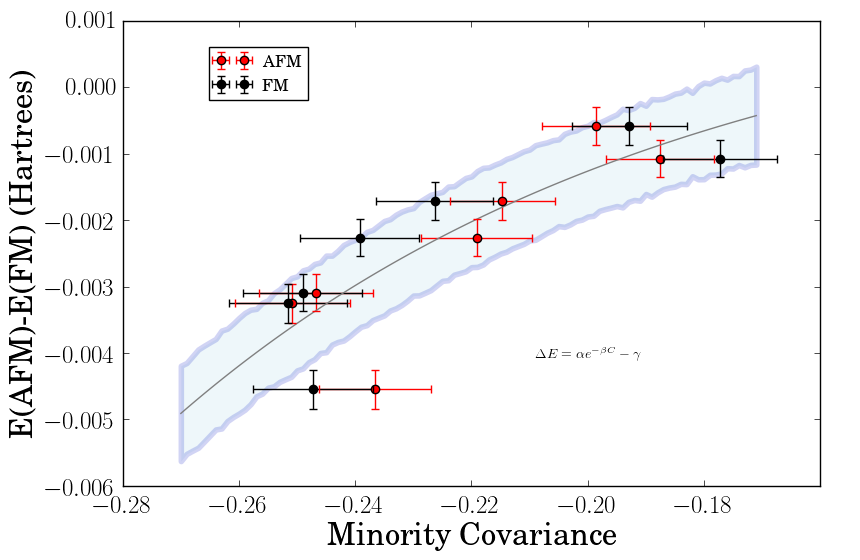

In [12]:
fig = plt.figure(figsize=(9, 6))

inds = MnO00fm.argsort()
sortedErrfm =errfm[inds]
sortedMnO00fm = np.sort(MnO00fm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

inds = MnO00afm.argsort()
sortedErrafm =errafm[inds]
sortedMnO00afm = np.sort(MnO00afm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

sortedMnOTot = np.concatenate((sortedMnO00fm,sortedMnO00afm))
sortedDiff2 = np.concatenate((sortedDiff,sortedDiff))

popt, pcov = curve_fit(func, sortedMnOTot, sortedDiff2, [-2.94001007e-04,1.11735185e+01,-1.62230001e-03])
x=np.arange(-0.27, -0.17, .001)
y= popt[0]*exp(-popt[1]*x)+popt[2]
error = np.random.normal(0.0007, 0.00002, size=y.shape)
plt.fill_between(x, y-error, y+error,    alpha=0.2, edgecolor='#1B2ACC', facecolor='lightblue',
    linewidth=4, antialiased=True)
plt.plot(x, y,color= 'grey')
plt.text(-.20, -0.004,r'$\Delta E = \alpha e^{- \beta C}-\gamma$', horizontalalignment='center',
     verticalalignment='center')
print(popt)
plt.tick_params(axis='y', which='major', labelsize=18)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.errorbar(sortedMnO00afm,sortedDiff,xerr=sortedErrafm,yerr=sortedDiffErr,marker='o',color='red',mew=1,linestyle='None',label = 'AFM')
plt.errorbar(sortedMnO00fm,sortedDiff,xerr=sortedErrfm,yerr=sortedDiffErr,marker='o',color='black',mew=1,linestyle='None',label ='FM')
plt.ylabel('E(AFM)-E(FM) (Hartrees)',fontsize=22)
plt.xlabel('Minority Covariance',fontsize=22)
plt.legend(bbox_to_anchor=(0.34, 0.87),
           bbox_transform=plt.gcf().transFigure)
plt.savefig("covar.pdf",bbox_inches="tight")
plt.show()

[ -2.94056301e-04   1.15169890e+01   1.68157587e-03]


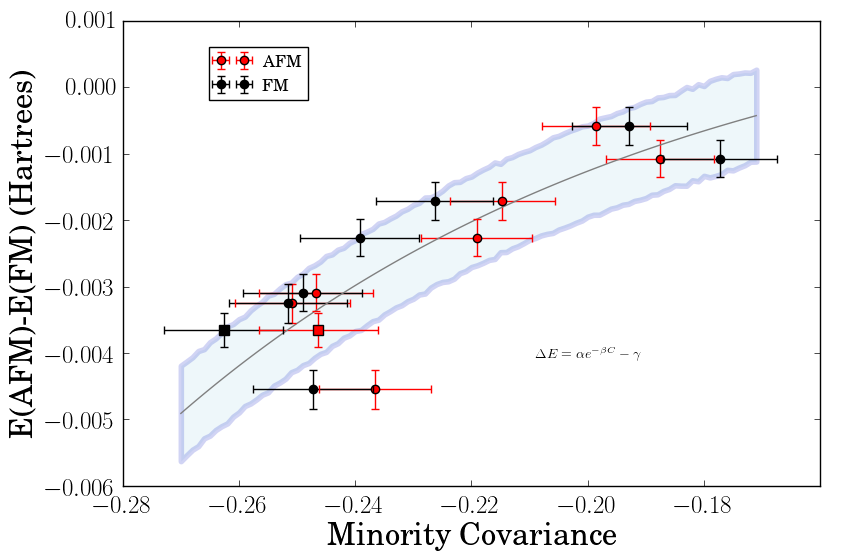

In [14]:
fig = plt.figure(figsize=(9, 6))

sortedMnO00fm = np.sort(MnO00fm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

inds = MnO00afm.argsort()
sortedErrafm =errafm[inds]
sortedMnO00afm = np.sort(MnO00afm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

sortedMnOTot = np.concatenate((sortedMnO00fm,sortedMnO00afm))
sortedDiff2 = np.concatenate((sortedDiff,sortedDiff))

popt, pcov = curve_fit(func, sortedMnOTot, sortedDiff2, [-2.94001007e-04,1.11735185e+01,-1.62230001e-03])
x=np.arange(-0.27, -0.17, .001)
y= popt[0]*exp(-popt[1]*x)+popt[2]
error = np.random.normal(0.0007, 0.00002, size=y.shape)
plt.fill_between(x, y-error, y+error,    alpha=0.2, edgecolor='#1B2ACC', facecolor='lightblue',
    linewidth=4, antialiased=True)
plt.plot(x, y,color= 'grey')
plt.text(-.20, -0.004,r'$\Delta E = \alpha e^{- \beta C}-\gamma$', horizontalalignment='center',
     verticalalignment='center')
print(popt)

plt.errorbar(sortedMnO00afm,sortedDiff,xerr=sortedErrafm,yerr=sortedDiffErr,marker='o',color='red',mew=1,linestyle='None',label = 'AFM')
plt.errorbar(sortedMnO00fm,sortedDiff,xerr=sortedErrfm,yerr=sortedDiffErr,marker='o',color='black',mew=1,linestyle='None',label ='FM')
plt.ylabel('E(AFM)-E(FM) (Hartrees)',fontsize=22)
plt.xlabel('Minority Covariance',fontsize=22)
plt.tick_params(axis='y', which='major', labelsize=18)
plt.tick_params(axis='x', which='major', labelsize=18)
soldiff = [-0.0036536375]
solerr = [0.00026]
solfmcovar = [-0.262576176373]
solfmerr = [0.0102362221221873]
plt.errorbar(solfmcovar,soldiff,xerr=solfmerr,yerr=solerr,marker='s',markersize=7,color='black',mew=1,linestyle='None')

solafmcovar = [-0.24632477282]
solafmerr = [0.01024465174517049]
plt.errorbar(solafmcovar,soldiff,xerr=solafmerr,yerr=solerr,marker='s',markersize=7,color='red',mew=1,linestyle='None')
plt.legend(bbox_to_anchor=(0.34, 0.87),
           bbox_transform=plt.gcf().transFigure)
plt.savefig("covarsolid.pdf",bbox_inches="tight")
plt.show()